<a href="https://colab.research.google.com/github/Briana-Sevilla/MAT-421/blob/main/Module_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Set 2: Module B**


## Section 17.1: Interpolation Problem Statement

Interpolation: an estamation method used to estimate data points using a reliable set of existing data points.
- Does not need an existing model for the data (unlike regression)  





\\

---

\\

## Section 17.2: Linear Interpolation

Linear interpolation is an interpolation method used to create a continuous curve with linear line segments. An interpolant at $\ x $ can be represented with the following equation:

$\ ŷ(x)=y_i+ \frac{(y_{i+1}-y_i)}{(x_{i+1}-x_i)} \cdot (x-x_i)$

where:
- x is an estimated point between the nearest point to the left and the nearest point to the right
- The x-data points are in ascending order
  - $\ x_i<x<x_{i+1}$

\\

Knowing this, lets find the linear interpolation at $\ x=3.5$ based on the data $\ x=[1, 2, 3, 4], y=[2, 5, 4, 1]$

Since $\ x=3.5, $ we need to look at the x-values in our data. Since $\ 3 < x < 4,$ we will be using the third and fourth data points. So, $\ i=3$; thus, $\ y_3=4,  y_4=1, x_3=3,$ and $\ x_4=4$. Now, plug this into our equation:


 $\ ŷ(x)=y_3+ \frac{(y_{3+1}-y_3)}{(x_{3+1}-x_3)} \cdot (x-x_3)$

 $=y_3+ \frac{(y_{4}-y_3)}{(x_{4}-x_3)} \cdot (x-x_3)$

 $=4+ \frac{(1-4)}{(4-3)} \cdot (3.5-3)$

 $=4+ \frac{-3}{1} \cdot (0.5)$

 $=4-(3 \cdot 0.5)$

$=4-1.5$

$=2.5$

We can check our answer using scipy's function *interp1d* :


In [1]:
from scipy.interpolate import interp1d
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([2, 5, 4, 1])

f = interp1d(x, y)
y_hat = f(3.5)

print(y_hat)

2.5


As you can see, our work above was correct! You can also make a graph to vizualize our linear interpolation.

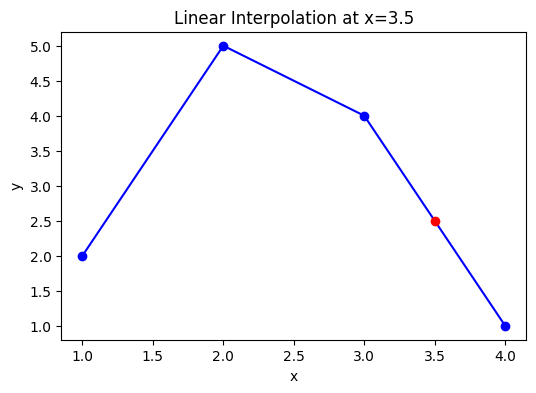

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
plt.plot(x, y, '-ob')
plt.plot(3.5, y_hat, 'or')
plt.title('Linear Interpolation at x=3.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

\\

---

\\

## Section 17.3: Cubic Spline Interpolation

Instead of having segments that are piecewise linear, in cubic spline interpolation, we have segments that are piecewise cubic functions. An interpolant at $\ x$ can be represented by the following cubic polynomial equation:

$\ S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$

where:
- $\ x_i \le x \le x_{i+1}$ , for $\ i=1,...,n-1$

We have n-1 cubic functions, where n is the number of data points. To find the interpolation function, we must find the value of the coefficients $\ a_i, b_i, c_i, d_i$ for each cubic function. Since we have $\ 4(n-1)$ unknown coefficients, we need $\ 4(n-1)$ independent equations to find their values. Once you find the values, you put them into matrix form (make sure your matrix is a square and invertible) and perform left division.

Luckily, you don't have to do all this work! You can simply use this kind of interpolation with scipy's *CubicSpline* function. Lets use it with the following data set:

$\ x=[1,2,3], y=[3,1,4]$ for $\ 2 \le x \le 3$

In [5]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([3, 1, 4])

cs = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(1, 3, 100)
y_new = cs(x_new)

s_hat = cs(2.5)

print(s_hat)


2.03125


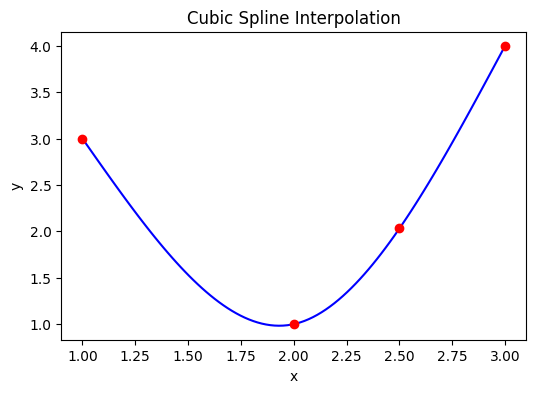

In [6]:
plt.figure(figsize = (6,4))
plt.plot(x_new, y_new, 'b') # plots cubic interpolation
plt.plot(x, y, 'ro') # plots data points
plt.plot(2.5, s_hat, 'or')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

\\

**The End**